# The Youth Tobacco Survey
In this project, I investigated Youth Tobacco usage by US state from 1999 to 2017 as reported by the CDC. The final report grades US states by how successful their efforts are to reduce various types of Youth Tobacco usage over time.  
In this project, I concentrated more on using SQL for data processing while Python is primarily used for plots.


## Data
For this analysis, I used a publicly available dataset. <br>
The dataset could be downloaded from:<br>
* __[Youth Tobacco Survey](https://catalog.data.gov/dataset/youth-tobacco-survey-yts-data
)__


## Data Preprocessing
Before I could start any analysis, I had to perform preprocessing of the dataset so the dataset could be utilized in the Python analysis.<br>
**Some of the preprocessing of the data is done in SQL.**<br><br>
The following preprocessing steps were employed:<br>
* I removed unnecessary variables not used in this project.
* I filter records so only high school students regardless of gender are considered.
* Additional filtering included only tobacco users and excluded Smokeless Tobacco, etc.


In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.dates as dates
import matplotlib.pyplot as plt
import matplotlib.colors as col
import matplotlib.cm as cm
df = pd.read_csv("..\\DataSets\\Tabaco\\Youth_Tobacco_Survey.csv")
colToKeep = ['YEAR', 'LocationAbbr', 'TopicDesc','MeasureDesc', 'Response', 'Data_Value', 'Education','Gender']
dfC =  df[colToKeep]
# filtering:
dfFilter = dfC.loc[(dfC['TopicDesc'] == 'Cigarette Use (Youth)')\
                   & (dfC['Gender'] == 'Overall')\
                   & (dfC['Education'] == 'High School')\
                   & (dfC['Response'] == 'Current')\
                       ]    
# save to file for sql use:
#dfFilter.to_csv('..\\DataSets\\Tabaco\\Youth_Tobacco_SurveyShort.csv', index=False)


##### Dataset of tobacco users by state (first 5 rows)

In [2]:
dfFilter.head(5)

,YEAR,LocationAbbr,TopicDesc,MeasureDesc,Response,Data_Value,Education,Gender
66,2003,ND,Cigarette Use (Youth),Smoking Status,Current,26.3,High School,Overall
75,2005,UT,Cigarette Use (Youth),Smoking Status,Current,10.3,High School,Overall
92,2015,HI,Cigarette Use (Youth),Smoking Status,Current,7.4,High School,Overall
95,2002,MS,Cigarette Use (Youth),Smoking Status,Current,23.3,High School,Overall
249,2013,HI,Cigarette Use (Youth),Smoking Status,Current,5.8,High School,Overall


## Analysis
### Trends over time
To start my analysis, I showed a thread of high school tobacco users from 1999 until 2017.<br>
It was a little surprising to notice that over 20 years ago, over 32% of students were current smokers.<br>


<IPython.core.display.Javascript object>


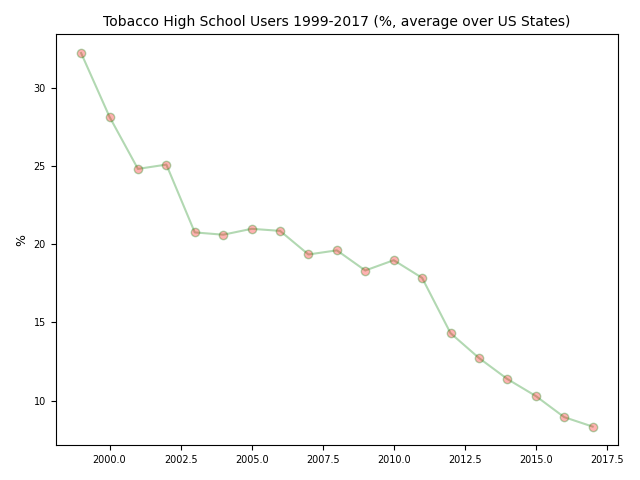

In [16]:
dfResultsDesc = dfFilter.groupby("YEAR").agg({"Data_Value":(np.nanmean)}).sort_values(by=['YEAR'], ascending=True).reset_index()
      
plt.figure()
plt.plot(dfResultsDesc.YEAR, dfResultsDesc['Data_Value'],  color='g', alpha = 0.3, label = 'White Sox',  marker='o', mfc='red')
ax = plt.gca()
ax.tick_params(axis="y", labelsize=7)
ax.tick_params(axis="x", labelsize=7)
plt.title('Tobacco High School Users 1999-2017 (%, average over US States)', fontsize='10')
plt.ylabel('%', fontsize='9')
plt.tight_layout()
plt.show()

### States Distribution
The next graph shows % distribution of active youth tobacco users by state.<br>
* It is clear that the % of smokers decreased dramatically between 1999 and the most recent year for a state.
* It is a little surprising that there are still states with a high % of youth smokers (around 25%)
**Note: SQL processing code is in the data folder **


<IPython.core.display.Javascript object>


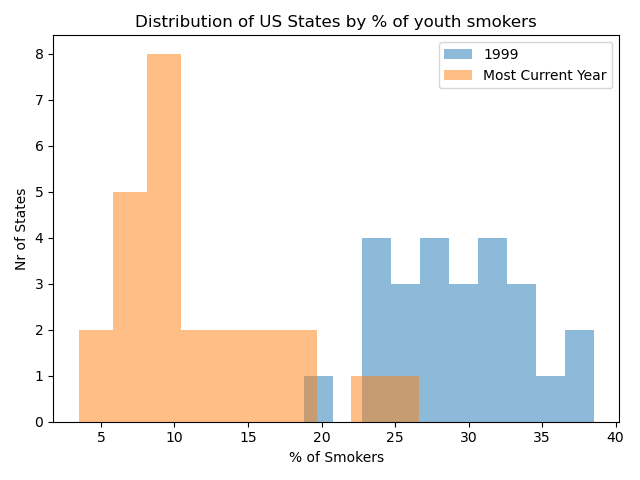

In [17]:
dfSQL = pd.read_csv("..\\DataSets\\Tabaco\\SQLYouth_Short.csv")
plt.figure()
plt.hist(dfSQL.Data_Value[dfSQL.maxORmin == -1], bins=10, alpha=0.5, label='1999')
plt.hist(dfSQL.Data_Value[dfSQL.maxORmin == 1], bins=10, alpha=0.5, label='Most Current Year')
plt.legend(loc='upper right')
plt.xlabel('% of Smokers')
plt.ylabel('Nr of States')
plt.title('Distribution of US States by % of youth smokers')
plt.tight_layout()
plt.show()


## Analysis at State Level
To find performance of each state I calculated the approximate decrease of tobacco users per year.<br>



In [21]:
# find the change over years
dfSQLStart = dfSQL[dfSQL.maxORmin == -1]
dfSQLEnd = dfSQL[dfSQL.maxORmin == 1]
dfMerged = pd.merge(dfSQLStart, dfSQLEnd, on="LocationAbbr", suffixes=('_Start', '_End'))
dfMerged['nrYears'] = dfMerged.YEAR_End - dfMerged.YEAR_Start
dfMerged['ValueYears'] = dfMerged.Data_Value_Start - dfMerged.Data_Value_End
dfMerged['PerYear'] = dfMerged['ValueYears']/dfMerged['nrYears'] 

<IPython.core.display.Javascript object>


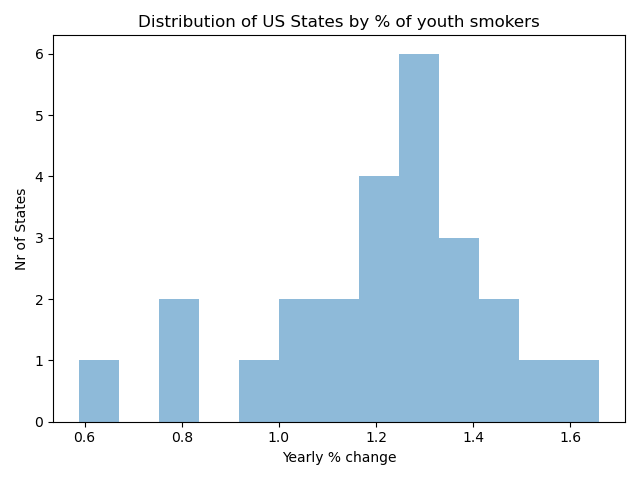

In [22]:
plt.figure()
plt.hist(dfMerged.PerYear, bins=13, alpha=0.5)
plt.xlabel('Yearly % change')
plt.ylabel('Nr of States')
plt.title('Distribution of US States by % of youth smokers')
plt.tight_layout()
plt.show()


TThe above figure shows the distribution of states' yearly changes (decrease) in high school students using tobacco. As we noticed, there are two outliers indicating states with very small decreases in youth smokers. 
<br><br>


__Note that in our approach, I was not trying to find states with the highest/lowest percentage of youth smokers. The measure ‘yearly change’ grades states on how much the yearly decrease of smokers regardless of starting or ending values is. Therefore, some of the states were left out of the list of the best performing states, even if the percentage of high school students that are smokers is very low.__



### Top 7 states with the highest yearly decrease of youth smokers
__(Note: Data_Value_End is the % of smokers for the last year reported)__

In [24]:
dfMerged[['LocationAbbr','Data_Value_End','PerYear',]].sort_values(by=['PerYear'], ascending=False).head(7)

,LocationAbbr,Data_Value_End,PerYear
24,WV,10.3,1.658824
23,WI,8.1,1.550000
6,IL,9.9,1.484615
19,OH,8.4,1.470588
13,MS,7.2,1.405556
7,IN,13.7,1.376923
11,MN,9.6,1.341176


### Bottom 7 states with the lowest yearly decrease of youth smokers
__(Note: Data_Value_End is the % of smokers for the last year reported)__

In [23]:
dfMerged[['LocationAbbr','Data_Value_End','PerYear',]].sort_values(by=['PerYear'], ascending=True).head(7)

,LocationAbbr,Data_Value_End,PerYear
9,LA,13.5,0.588889
12,MO,18.1,0.800000
17,NH,17.0,0.830000
4,GA,8.2,0.968750
22,SC,12.0,1.033333
8,KY,26.6,1.080000
5,HI,6.0,1.088235


## Conclusion
* To some extent, it was shocking to me to discover that 20 years ago, over 30% of high school students were smokers. 
* It is also surprising to see that there are states with a high percentage of high school smokers (KY, SC, MO)
* The midwestern states (IL, WI, IN, MN) have the highest values for yearly decrease. 
* The states in the southeast (NC, GA, LA) have the smallest values for yearly decrease. 